# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,\
    GradientBoostingRegressor, StackingRegressor, RandomForestRegressor, StackingClassifier
from sklearn.base import clone
from itertools import combinations
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('telecom_users.csv', sep=',', index_col=0, encoding="UTF-8")
df.sort_index(ascending=True, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
from io import StringIO
import sys


class OutputInterceptor(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self

    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio
        sys.stdout = self._stdout


with OutputInterceptor() as output:
    df.info(verbose=False)
row = int(''.join(output).split()[2])
print('В датасете:', ''.join(output).split()[
      2], 'строк,', ''.join(output).split()[7], 'столбцов')

В датасете: 5986 строк, 21 столбцов


In [40]:
print('\nПеречень столбцов:', ', '.join(list(df)))


Перечень столбцов: customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn


In [41]:
print('\nТипы данных:\n\n', df.dtypes)


Типы данных:

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [42]:
if sum(list(df.isnull().sum())) == 0:
    print('NaN-строки отсутствуют')
else:
    print('NaN-строки присутствуют в количестве:')
    print(df.isnull().sum())

NaN-строки отсутствуют


###### Предварительная подготовка данных

In [4]:
# Дополнительная метрика - количество одновременно подключенных сервисов/услуг
# Есть умозрительное заключение, что количество одновременно подключенных услуг
# может сильно коррелировать с целевым признаком. Проверим эту гипотезу.
# Кстати, она НЕ подтвердится (( Но пусть будет...

service_list = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['service_total'] = df[service_list].replace({'No': 0, 'Yes': 1,
                                                'No internet service': 0, 'No phone service': 0}).sum(axis=1)

# заполнение нулями пустых значений в TotalCharges по новым абонентам
df['TotalCharges'].replace(r'^\s*$', '0', regex=True, inplace=True)
df['TotalCharges'] = df.TotalCharges.astype(float)

# конвертация строковых дискретных значений в целочисленные категориальные значения, удаление customerID
df = df.drop(['customerID'], axis=1)
df = pd.get_dummies(df, drop_first=True)

# Перенос столбца c target 'Churn_Yes' в начало датасета для удобства
cols = df.columns.tolist()
df = df[['Churn_Yes'] +
        cols[:df.columns.get_loc('Churn_Yes')] + cols[df.columns.get_loc('Churn_Yes') + 1:]]
df.head()

,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,service_total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,34,56.95,1889.50,3,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,2,53.85,108.15,3,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,45,42.30,1840.75,3,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### Описание недискретных данных (tenure, MonthlyCharges, TotalCharges)

### tenure

Text(0.5, 1.0, 'Cколько месяцев человек являлся клиентом компании')

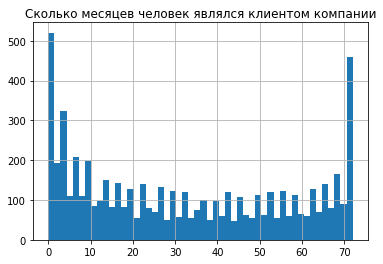

In [44]:
df.tenure.hist(bins=50)
plt.title('Cколько месяцев человек являлся клиентом компании')


За пределы 3-х сигм выходит: 0 значений.

Базовые метрики
count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
1     510
72    308
2     194
3     169
4     154
Name: tenure, dtype: int64
------------------------------------
Эксцесс  -1.386675677422663
Ассиметрия  0.23376356878372992


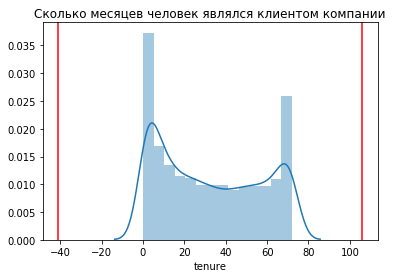

In [45]:
upper_level = df.tenure.mean() + 3*df.tenure.std()
lower_level = df.tenure.mean() - 3*df.tenure.std()
sns.distplot(df.tenure)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.title('Cколько месяцев человек являлся клиентом компании')
print('\nЗа пределы 3-х сигм выходит:',
      df[(df['tenure'] < lower_level) | (df['tenure'] > upper_level)]['tenure'].count(), 'значений.\n')
print("Базовые метрики")
print(df.tenure.describe())
print("------------------------------------")

print("Самые популярные значения метрики, топ 5")
print(df.tenure.value_counts().nlargest(5))
print("------------------------------------")

print("Эксцесс ", kurtosis(df.tenure))
print("Ассиметрия ", skew(df.tenure))

### MonthlyCharges

Text(0.5, 1.0, 'Месячный размер оплаты')

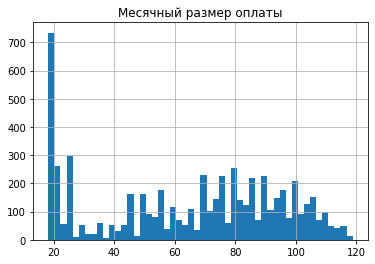

In [46]:
df.MonthlyCharges.hist(bins =  50)
plt.title('Месячный размер оплаты')


За пределы 3-х сигм выходит: 0 значений.

Базовые метрики
count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
20.05    50
19.85    40
19.70    39
19.55    37
19.95    36
Name: MonthlyCharges, dtype: int64
------------------------------------
Эксцесс  -1.2596210933839722
Ассиметрия  -0.21862368693019327


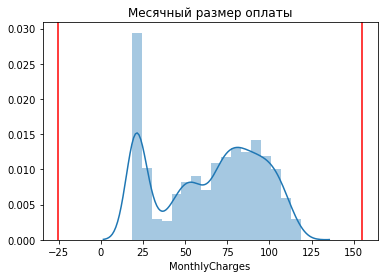

In [47]:
upper_level = df.MonthlyCharges.mean() + 3*df.MonthlyCharges.std()
lower_level = df.MonthlyCharges.mean() - 3*df.MonthlyCharges.std()
sns.distplot(df.MonthlyCharges)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.title('Месячный размер оплаты')
print('\nЗа пределы 3-х сигм выходит:',
      df[(df['MonthlyCharges'] < lower_level) | (df['MonthlyCharges'] > upper_level)]['MonthlyCharges'].count(), 'значений.\n')
print("Базовые метрики")
print(df.MonthlyCharges.describe())
print("------------------------------------")

print("Самые популярные значения метрики, топ 5")
print(df.MonthlyCharges.value_counts().nlargest(5))
print("------------------------------------")

print("Эксцесс ", kurtosis(df.MonthlyCharges))
print("Ассиметрия ", skew(df.MonthlyCharges))

### TotalCharges

Text(0.5, 1.0, 'Общая сумма оплаченных услуг за все время')

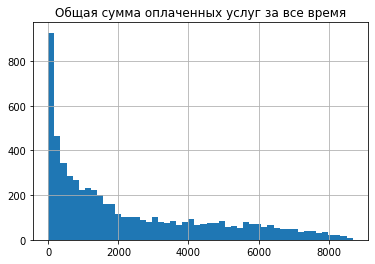

In [48]:
df.TotalCharges.hist(bins =  50)
plt.title('Общая сумма оплаченных услуг за все время')


За пределы 3-х сигм выходит: 0 значений.

Базовые метрики
count    5986.000000
mean     2294.221559
std      2274.164124
min         0.000000
25%       401.587500
50%      1408.575000
75%      3841.500000
max      8684.800000
Name: TotalCharges, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
20.20    10
0.00     10
19.75     8
19.55     7
20.05     6
Name: TotalCharges, dtype: int64
------------------------------------
Эксцесс  -0.2617451125360426
Ассиметрия  0.9510332338710766


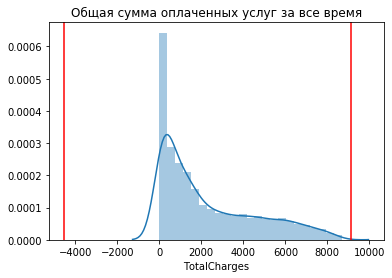

In [49]:
upper_level = df.TotalCharges.mean() + 3*df.TotalCharges.std()
lower_level = df.TotalCharges.mean() - 3*df.TotalCharges.std()
sns.distplot(df.TotalCharges)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.title('Общая сумма оплаченных услуг за все время')
print('\nЗа пределы 3-х сигм выходит:',
      df[(df['TotalCharges'] < lower_level) | (df['TotalCharges'] > upper_level)]['TotalCharges'].count(), 'значений.\n')
print("Базовые метрики")
print(df.TotalCharges.describe())
print("------------------------------------")

print("Самые популярные значения метрики, топ 5")
print(df.TotalCharges.value_counts().nlargest(5))
print("------------------------------------")

print("Эксцесс ", kurtosis(df.TotalCharges))
print("Ассиметрия ", skew(df.TotalCharges))

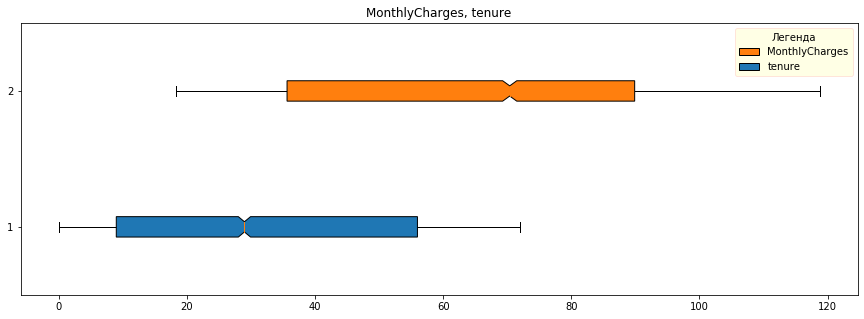

In [50]:
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots(figsize=(15, 5))
ax1.set_title('MonthlyCharges, tenure')
bp1 = ax1.boxplot(df.tenure, positions=[1], vert=False, flierprops=red_square, notch=True,
                  patch_artist=True, boxprops=dict(facecolor="C0"))
bp2 = ax1.boxplot(df.MonthlyCharges, positions=[2], vert=False, flierprops=red_square, notch=True,
                  patch_artist=True, boxprops=dict(facecolor="C1"))

ax1.legend([bp2['boxes'][0], bp1['boxes'][0]],
           ['MonthlyCharges', 'tenure'], loc='upper right',
           facecolor='yellow', edgecolor='r', framealpha=.1, title='Легенда')
plt.show()

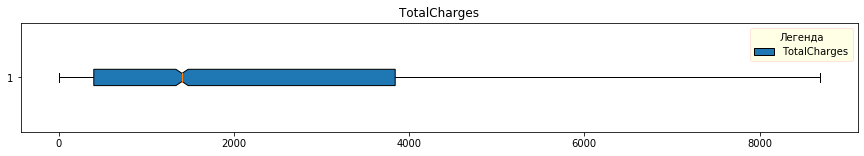

In [51]:
red_square = dict(markerfacecolor='r', marker='s')
data = [df.TotalCharges]
fig2, ax2 = plt.subplots(figsize=(15, 2))
ax2.set_title('TotalCharges')
bp3 = ax2.boxplot(df.TotalCharges, positions=[1], vert=False, flierprops=red_square, notch=True,
                  patch_artist=True, boxprops=dict(facecolor="C40"))
ax2.legend([bp3['boxes'][0]],
           ['TotalCharges'], loc='upper right',
           facecolor='yellow', edgecolor='r', framealpha=.1, title='Легенда')
plt.show()

### Выбросы в рассмотренных метриках отсутствуют

---

# 2. Исследование зависимостей и формулирование гипотез

#### Осуществим поиск возможных взаимосвязей по Чеддоку

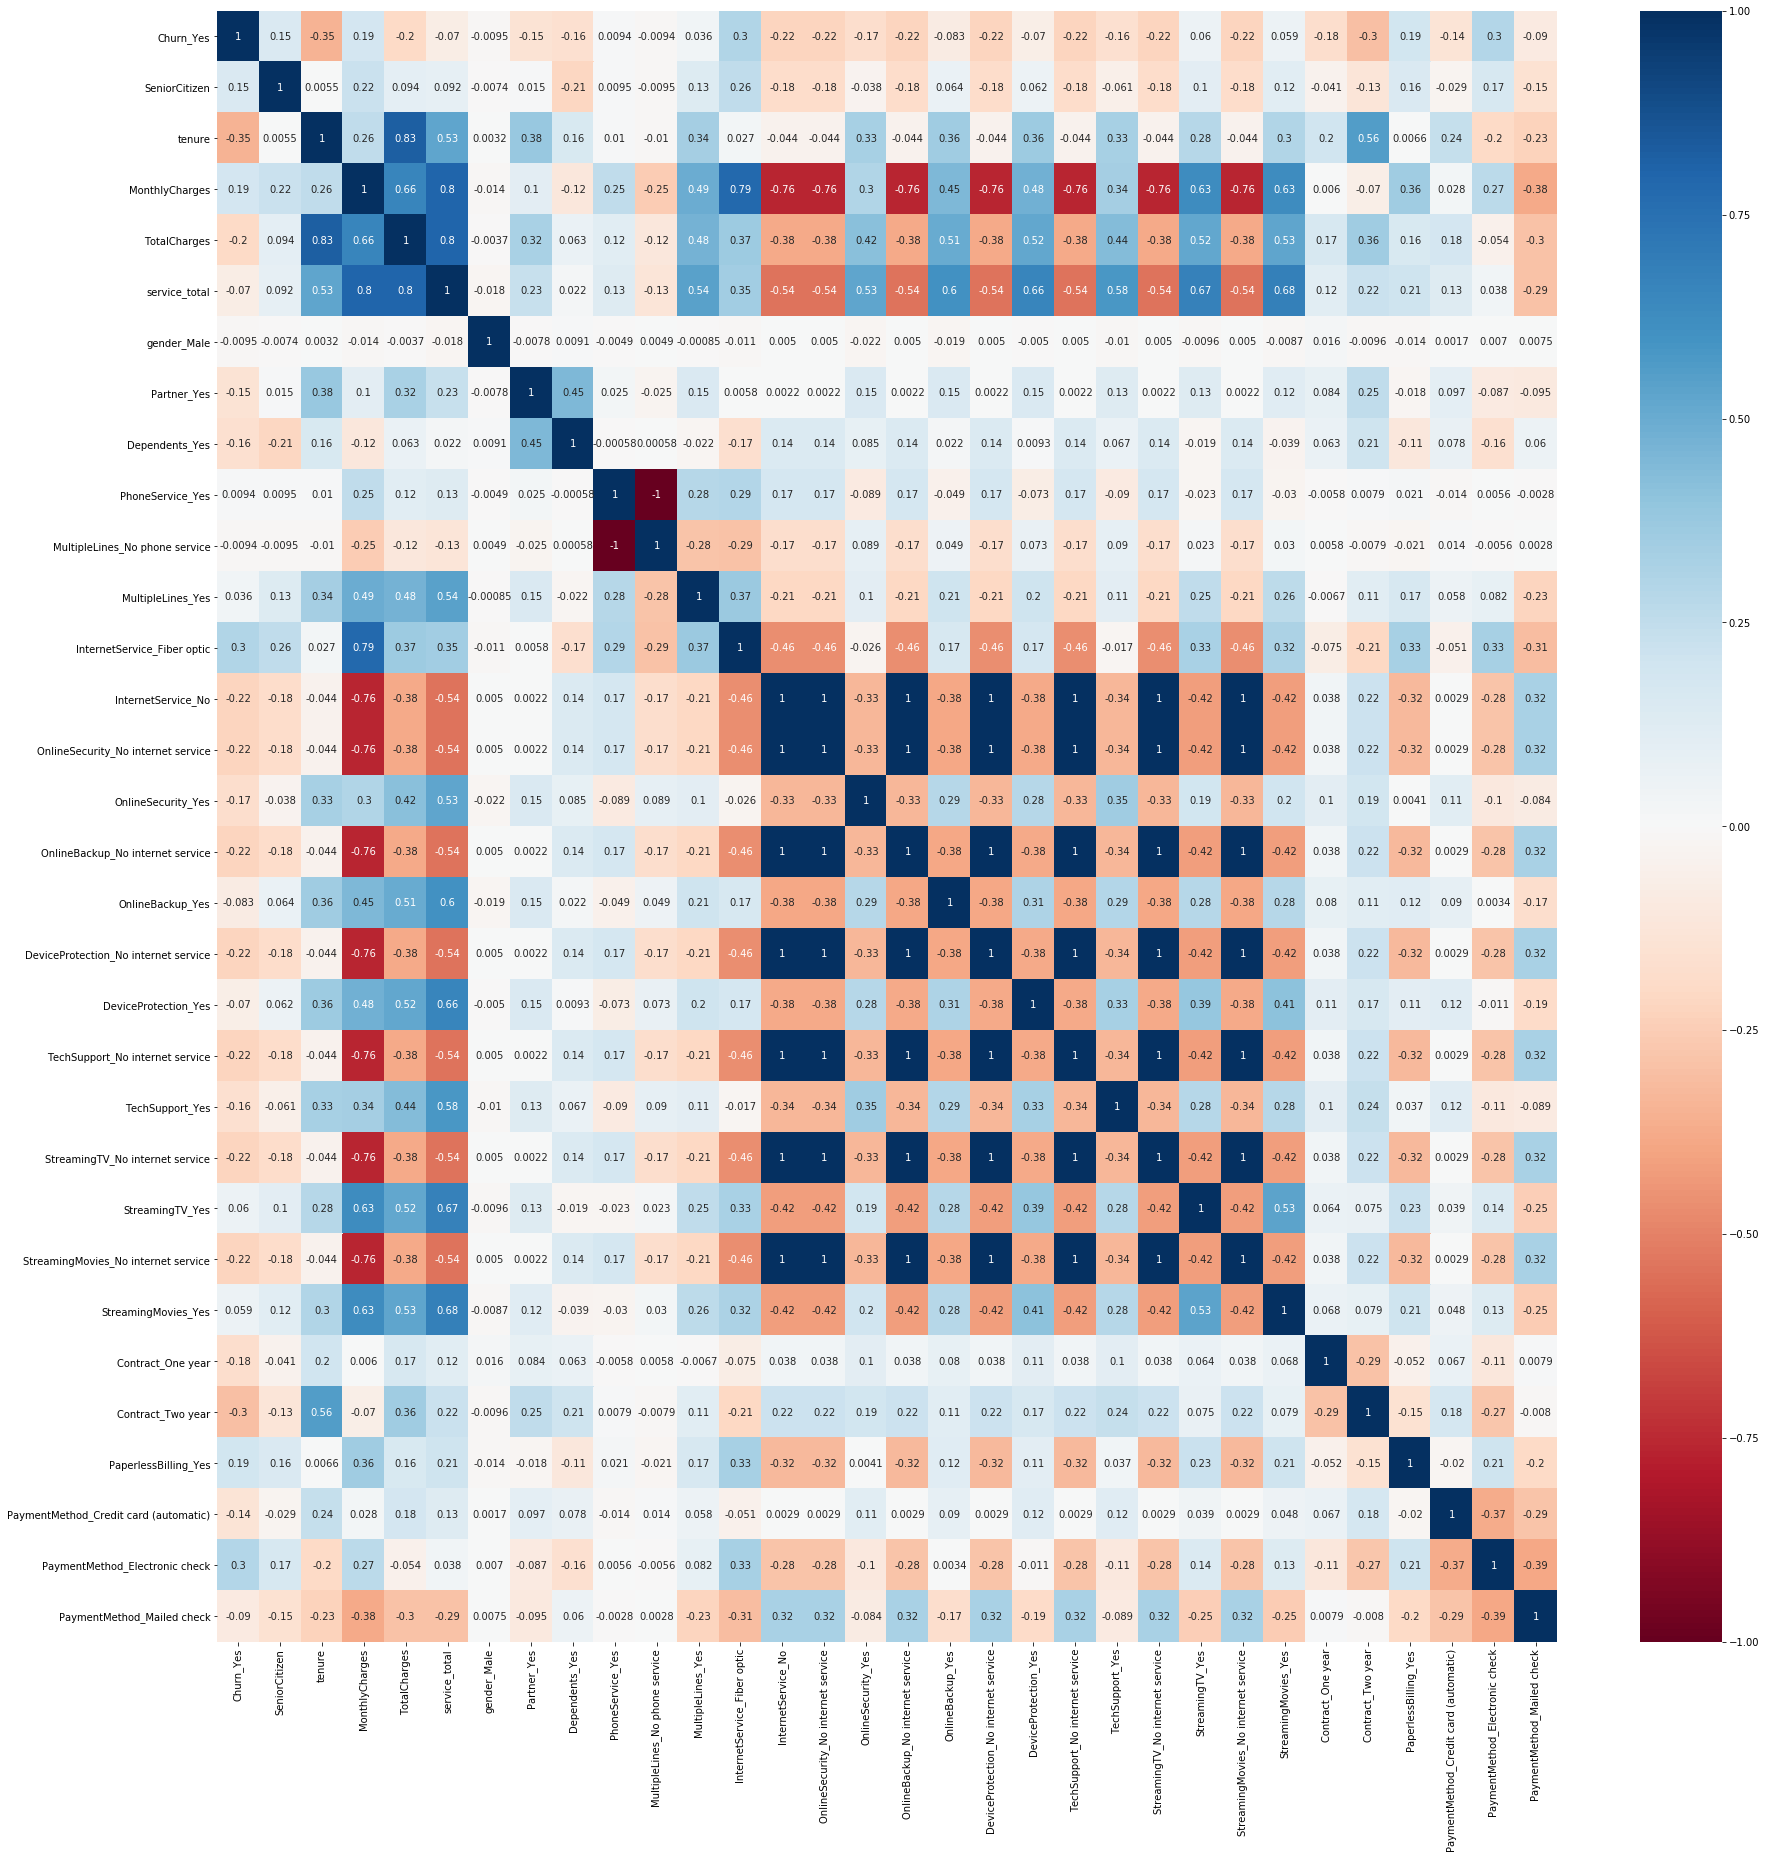

In [48]:
colormap = plt.cm.RdBu
research_list = list(df)
# матрица парных корреляций для отобранных данных
corr_m = df[research_list].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_m, center=0, cmap=colormap, linecolor='white', annot=True)

#### Некоторые графики коэффициентов корреляции непререрывных метрик


Коэффициент корреляции: 0.6567616529268757


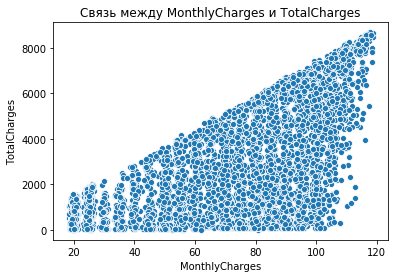


Коэффициент корреляции: 0.803243641936082


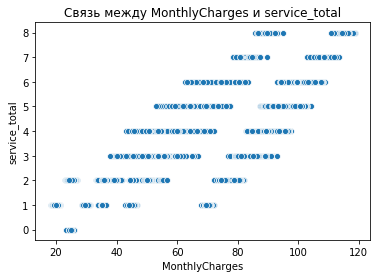


Коэффициент корреляции: 0.7856727106530589


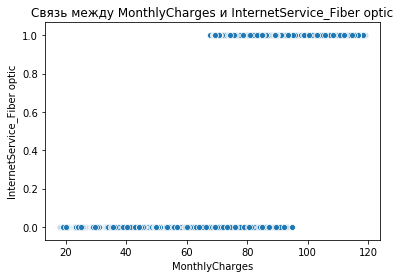

In [53]:
level = 0.65
for i in list(df):
    curr_corr = df[i].corr(df.MonthlyCharges)
    if curr_corr >= level:
        if i != 'MonthlyCharges':
            sns.scatterplot(x='MonthlyCharges', y=i, data=df)
            print('\nКоэффициент корреляции: ' + str(curr_corr))
            plt.title('Связь между MonthlyCharges и ' + str(i))
            plt.show()


Коэффициент корреляции: 0.8277555036397936


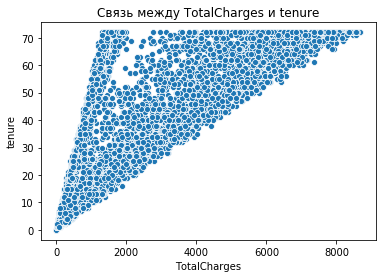


Коэффициент корреляции: 0.6567616529268757


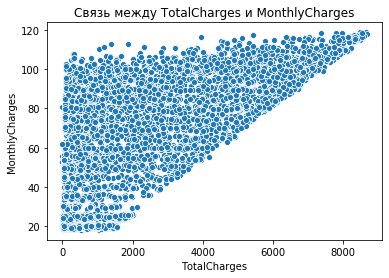


Коэффициент корреляции: 0.7984977051779849


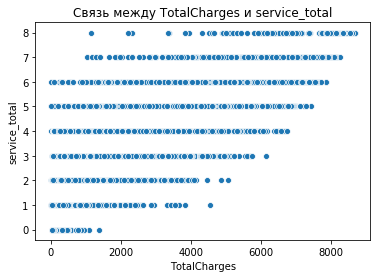

In [54]:
level = 0.6
for i in list(df):
    curr_corr = df[i].corr(df.TotalCharges)
    if curr_corr > level:
        if i != 'TotalCharges':
            sns.scatterplot(x='TotalCharges', y=i, data=df)
            print('\nКоэффициент корреляции: ' + str(curr_corr))
            plt.title('Связь между TotalCharges и ' + str(i))
            plt.show()

In [85]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]],
                                                    df['Churn_Yes'], train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=17)
print('Матрица Объекты X Фичи  (размерность): %s %s' %
      df[df.columns[1:]].shape)
print('Целевая переменная y (размерность): %s' % df['Churn_Yes'].shape)
print('\nМатрица Объекты X Фичи TRAIN (размерность): %s %s' % x_train.shape)
print('Целевая переменная y TRAIN (размерность): %s' % y_train.shape)
print('\nМатрица Объекты X Фичи  TEST (размерность): %s %s' % x_test.shape)
print('Целевая переменная y TEST (размерность): %s' % y_test.shape)

Матрица Объекты X Фичи  (размерность): 5986 31
Целевая переменная y (размерность): 5986

Матрица Объекты X Фичи TRAIN (размерность): 4788 31
Целевая переменная y TRAIN (размерность): 4788

Матрица Объекты X Фичи  TEST (размерность): 1198 31
Целевая переменная y TEST (размерность): 1198


# Выбор метрик, имеющих наиболее тесные взаимосвязи с целевой переменной.

## Метод 1. Оценка важности признаков с помощью SBS

In [49]:
# 'Жадная' функция последовательного обратного выбора признаков (SBS)
class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=.2, random_state=17):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test,
                    indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

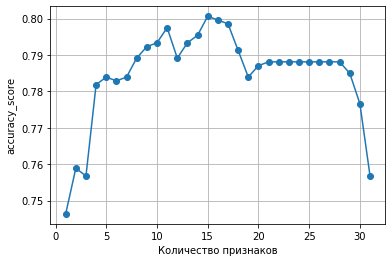

In [50]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x_train)
X_test_std = stdsc.transform(x_test)
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1, random_state=17)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
# plt.ylim([0.7,0.8])
# plt.xlim([10,15])
plt.ylabel('accuracy_score')
plt.xlabel('Количество признаков')
plt.grid()
plt.show()

In [51]:
# Набор признаков, обеспечивающий максимальную эффективность на проверочном наборе данных
k15 = list(sbs.subsets_[16])
print('Отобранные фичи:', df.columns[1:][k15])
knn.fit(X_train_std, y_train)
print('\nscore при обучении по всем фичам:', knn.score(X_train_std, y_train))
print('score при испытании по всем фичам:', knn.score(X_test_std, y_test))
knn.fit(X_train_std[:, k15], y_train)
print('\nscore при обучении на отобранных фичах:',
      knn.score(X_train_std[:, k15], y_train))
print('score при испытании на отобранных фичах:',
      knn.score(X_test_std[:, k15], y_test))

Отобранные фичи: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')

score при обучении по всем фичам: 0.8276942355889725
score при испытании по всем фичам: 0.7420701168614358

score при обучении на отобранных фичах: 0.8333333333333334
score при испытании на отобранных фичах: 0.7495826377295493


#### Наблюдение: применение метода SBS улучшило качество модели

## Метод 2: оценка важности признаков с помощью случайных лесов

 1) SeniorCitizen                            0.183530
 2) tenure                                   0.164672
 3) MonthlyCharges                           0.157577
 4) TotalCharges                             0.044654
 5) service_total                            0.039321
 6) gender_Male                              0.037572
 7) Partner_Yes                              0.030483
 8) Dependents_Yes                           0.028811
 9) PhoneService_Yes                         0.025452
10) MultipleLines_No phone service           0.023170
11) MultipleLines_Yes                        0.022778
12) InternetService_Fiber optic              0.022745
13) InternetService_No                       0.022146


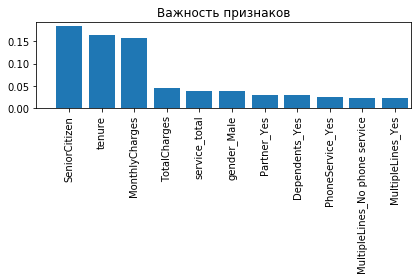

In [52]:
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=17)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    if importances[indices[f]] > .021:
        print('%2d) %-*s %f' %
              (f+1, 40, feat_labels[f], importances[indices[f]]))
plt.title('Важность признаков')
plt.bar(range(x_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(x_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim([-1, x_train.shape[1]-20.5])
plt.tight_layout()
plt.show()

## Метод 3: экстремальный градиентный бустинг XGBoost

[0]	test-logloss:0.65418	train-logloss:0.65328
[1]	test-logloss:0.62233	train-logloss:0.62064
[2]	test-logloss:0.59615	train-logloss:0.59359
[3]	test-logloss:0.57464	train-logloss:0.57136
[4]	test-logloss:0.55615	train-logloss:0.55183
[5]	test-logloss:0.54058	train-logloss:0.53529
[6]	test-logloss:0.52540	train-logloss:0.52062
[7]	test-logloss:0.51392	train-logloss:0.50816
[8]	test-logloss:0.50367	train-logloss:0.49736
[9]	test-logloss:0.49357	train-logloss:0.48696
[10]	test-logloss:0.48560	train-logloss:0.47862
[11]	test-logloss:0.47857	train-logloss:0.47133
[12]	test-logloss:0.47251	train-logloss:0.46493
[13]	test-logloss:0.46715	train-logloss:0.45925
[14]	test-logloss:0.46200	train-logloss:0.45380
[15]	test-logloss:0.45791	train-logloss:0.44936
[16]	test-logloss:0.45392	train-logloss:0.44533
[17]	test-logloss:0.45042	train-logloss:0.44152
[18]	test-logloss:0.44732	train-logloss:0.43806
[19]	test-logloss:0.44467	train-logloss:0.43502
[20]	test-logloss:0.44202	train-logloss:0.43212
[2

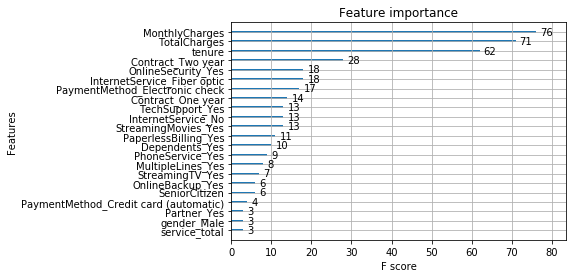

In [86]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1,
          'eval_metric': 'logloss'}

num_rounds = 60

xgb_model = xgb.train(params, dtrain, num_rounds)

evals = [(dtest, 'test'), (dtrain, 'train')]
xgb_model = xgb.train(params, dtrain, num_rounds, evals)

xgb.plot_importance(xgb_model)

##### Выберем из трех методов наиболее значимые метрики.

In [5]:
# Итоговый набор значимых признаков
# TotalCharges не принимаем во внимание, т.к. TotalCharges = MonthlyCharges * tenure

features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Contract_Two year']
target = ['Churn_Yes']

In [6]:
# Окончательная подготовка датасета для подбора моделей обучения
df = df[target + features]
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]],
                                                    df['Churn_Yes'], train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=17)
print('Матрица Объекты X Фичи  (размерность): %s %s' %
      df[df.columns[1:]].shape)
print('Целевая переменная y (размерность): %s' % df['Churn_Yes'].shape)
print('\nМатрица Объекты X Фичи TRAIN (размерность): %s %s' % x_train.shape)
print('Целевая переменная y TRAIN (размерность): %s' % y_train.shape)
print('\nМатрица Объекты X Фичи  TEST (размерность): %s %s' % x_test.shape)
print('Целевая переменная y TEST (размерность): %s' % y_test.shape)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x_train)
X_test_std = stdsc.transform(x_test)

Матрица Объекты X Фичи  (размерность): 5986 4
Целевая переменная y (размерность): 5986

Матрица Объекты X Фичи TRAIN (размерность): 4788 4
Целевая переменная y TRAIN (размерность): 4788

Матрица Объекты X Фичи  TEST (размерность): 1198 4
Целевая переменная y TEST (размерность): 1198


# 3. Построение моделей для прогнозирования оттока

In [7]:
#k-Fold кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

* ###### Метод ближайших соседей KNN

In [8]:
knn_params = {'n_neighbors': range(1, 20)}
knn = KNeighborsClassifier(**knn_params)
knn_gs = GridSearchCV(knn, knn_params, cv=skf)
knn_gs_model = knn_gs.fit(X_train_std, y_train)
knn_gs_predictions = knn_gs_model.predict(X_test_std)
knn_gs_accuracy = accuracy_score(y_test, knn_gs_predictions)
print('KNN best params:', knn_gs_model.best_params_)
print(f'KNN accuracy: {knn_gs_accuracy}')
print(f'KNN f1_score: {f1_score(y_test, knn_gs_predictions)}')
print(f'KNN roc_auc_score: {roc_auc_score(y_test, knn_gs_predictions)}')
print(f'KNN cross_val_score: {cross_val_score(knn_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

KNN best params: {'n_neighbors': 16}
KNN accuracy: 0.7954924874791319
KNN f1_score: 0.5553539019963702
KNN roc_auc_score: 0.6930018222596019
KNN cross_val_score: 0.7857143168783799


* ###### Наивный байесовский классификатор

In [9]:
gnb_params = {'var_smoothing': np.array([1e-10, 5e-10, 1e-9, 1.5e-9])}
gnb = GaussianNB(**gnb_params)
gnb_gs = GridSearchCV(gnb, gnb_params, cv=skf)
gnb_gs_model = gnb_gs.fit(X_train_std, y_train)
gnb_gs_predictions = gnb_gs_model.predict(X_test_std)
gnb_gs_accuracy = gnb_gs.score(X_test_std, y_test)
print('GNB best params:', gnb_gs_model.best_params_)
print(f'GNB accuracy: {gnb_gs_accuracy}')
print(f'GNB f1_score: {f1_score(y_test, gnb_gs_predictions)}')
print(f'GNB roc_auc_score: {roc_auc_score(y_test, gnb_gs_predictions)}')
print(f'GNB cross_val_score: {cross_val_score(gnb_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

GNB best params: {'var_smoothing': 1e-10}
GNB accuracy: 0.7128547579298832
GNB f1_score: 0.5952941176470589
GNB roc_auc_score: 0.7310730305578919
GNB cross_val_score: 0.6996601243883657


* ###### Дерево принятия решений

In [10]:
dtc_params = {'max_depth': range(1, 15), 'max_features': range(1, 5), 'criterion': np.array(['gini', 'entropy'])}
dtc = DecisionTreeClassifier(random_state=17, **dtc_params)
dtc_gs = GridSearchCV(dtc, dtc_params, cv=skf)
dtc_gs_model = dtc_gs.fit(X_train_std, y_train)
dtc_gs_predictions = dtc_gs_model.predict(X_test_std)
dtc_gs_accuracy = dtc_gs.score(X_test_std, y_test)
print('DTC best params:', dtc_gs_model.best_params_)
print(f'DTC accuracy: {dtc_gs_accuracy}')
print(f'DTC f1_score: {f1_score(y_test, dtc_gs_predictions)}')
print(f'DTC roc_auc_score: {roc_auc_score(y_test, dtc_gs_predictions)}')
print(f'DTC cross_val_score: {cross_val_score(dtc_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

DTC best params: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4}
DTC accuracy: 0.7838063439065108
DTC f1_score: 0.5383244206773619
DTC roc_auc_score: 0.6830564900476591
DTC cross_val_score: 0.782581265829412


* ###### Логистическая регрессия

In [11]:
lr_params = {'C': np.arange(0.1, 1, 0.1), 'multi_class': np.array(['auto', 'ovr', 'multinomial']),
             'solver': np.array(['newton-cg', 'lbfgs', 'sag', 'saga'])}
lr = LogisticRegression(random_state=17, **lr_params)
lr_gs = GridSearchCV(lr, lr_params, cv=skf)
lr_gs_model = lr_gs.fit(X_train_std, y_train)
lr_gs_predictions = lr_gs_model.predict(X_test_std)
lr_gs_accuracy = lr_gs.score(X_test_std, y_test)
print('LR best params:', lr_gs_model.best_params_)
print(f'LR accuracy: {lr_gs_accuracy}')
print(f'LR f1_score: {f1_score(y_test, lr_gs_predictions)}')
print(f'LR roc_auc_score: {roc_auc_score(y_test, lr_gs_predictions)}')
print(f'LR cross_val_score: {cross_val_score(lr_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

LR best params: {'C': 0.1, 'multi_class': 'auto', 'solver': 'newton-cg'}
LR accuracy: 0.7754590984974958
LR f1_score: 0.5100182149362477
LR roc_auc_score: 0.6668629100084105
LR cross_val_score: 0.7934428875901773


###### альтернативные исследования LogisticRegression перебором параметров по сетке с последующей кросс-валидацией

In [11]:
my_array = np.logspace(-1, 2, num=500, endpoint=True)
clf = LogisticRegressionCV(
    Cs=my_array, cv=skf, multi_class='ovr', scoring='roc_auc', random_state=17, max_iter=1000)
lrc_model = clf.fit(X_train_std, y_train)
lrc_predictions = clf.predict(X_test_std)
print(f'LR_CV accuracy: {clf.score(X_test_std, y_test)}')
print(f'LR_CV f1_score: {f1_score(y_test, lrc_predictions)}')
print(f'LR_CV roc_auc_score: {roc_auc_score(y_test, lrc_predictions)}')
print(f'LR_CV cross_val_score: {cross_val_score(lrc_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

LR_CV accuracy: 0.8168576534903281
LR_CV f1_score: 0.5098743267504487
LR_CV roc_auc_score: 0.6664634146341463
LR_CV cross_val_score: 0.8159212930162114


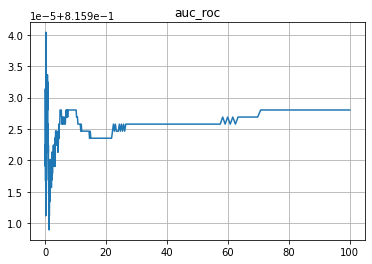

In [12]:
fig, ax = plt.subplots()
x = np.logspace(-1, 2, num=500, endpoint=True)
y = clf.scores_[1].mean(axis=0)
plt.plot(x, y)
plt.title('auc_roc')
ax.grid(True)
plt.show()

In [13]:
clf.C_ #лучшее значение C array([0.31116158])

array([0.31116158])

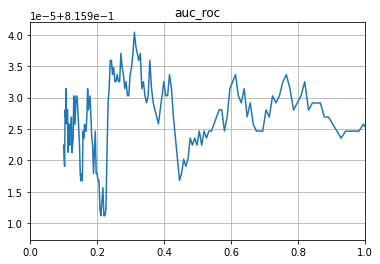

In [14]:
# отмасштабируем на меньшем участке по оси X
fig, ax = plt.subplots()
plt.xlim(right=1)
x = np.logspace(-1, 2, num=500, endpoint=True)
y = clf.scores_[1].mean(axis=0)
plt.plot(x, y)
plt.title('auc_roc')
ax.grid(True)
plt.show()

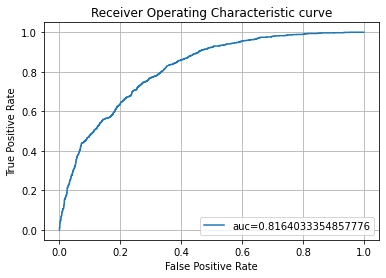

In [41]:
# вероятности принадлежности объектов тестовой выборки к классам
probas = clf.fit(X_train_std, y_train).predict_proba(X_train_std)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.grid()
plt.show()

In [16]:
print(classification_report(y_test, lrc_predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       870
           1       0.62      0.43      0.51       328

    accuracy                           0.77      1198
   macro avg       0.71      0.67      0.68      1198
weighted avg       0.76      0.77      0.76      1198



* ###### Метод опорных векторов SVM

In [12]:
svc_params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.1, 1, 0.2)}
svc = SVC(random_state=17, probability=True, **svc_params)
svc_gs = GridSearchCV(svc, svc_params, cv=skf)
svc_gs_model = svc_gs.fit(X_train_std, y_train)
svc_gs_predictions = svc_gs_model.predict(X_test_std)
svc_gs_accuracy = svc_gs.score(X_test_std, y_test)
print('SVC best params:', svc_gs_model.best_params_)
print(f'SVC accuracy: {svc_gs_accuracy}')
print(f'SVC f1_score: {f1_score(y_test, svc_gs_predictions)}')
print(f'SVC roc_auc_score: {roc_auc_score(y_test, svc_gs_predictions)}')
print(f'SVC cross_val_score: {cross_val_score(svc_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

SVC best params: {'C': 0.30000000000000004, 'kernel': 'linear'}
SVC accuracy: 0.7712854757929883
SVC f1_score: 0.5124555160142349
SVC roc_auc_score: 0.6677880571909168
SVC cross_val_score: 0.7934424512928582


* ###### Метод случайных лесов

In [24]:
rfc_params = {'n_estimators': range(10, 100, 10), 'min_samples_leaf': range(1, 8), 'max_depth': range(1, 13, 2)}
rfc = RandomForestClassifier(random_state=17, **rfc_params)
rfc_gs = GridSearchCV(rfc, rfc_params, cv=skf)
rfc_gs_model = rfc_gs.fit(X_train_std, y_train)
rfc_gs_predictions = rfc_gs_model.predict(X_test_std)
rfc_gs_accuracy = rfc_gs.score(X_test_std, y_test)
print('RFC best params:', rfc_gs_model.best_params_)
print(f'RFC accuracy: {rfc_gs_accuracy}')
print(f'RFC f1_score: {f1_score(y_test, rfc_gs_predictions)}')
print(f'RFC roc_auc_score: {roc_auc_score(y_test, rfc_gs_predictions)}')
print(f'RFC cross_val_score: {cross_val_score(rfc_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

RFC best params: {'max_depth': 9, 'min_samples_leaf': 7, 'n_estimators': 60}
RFC accuracy: 0.7871452420701168
RFC f1_score: 0.5372050816696914
RFC roc_auc_score: 0.6825063078216989
RFC cross_val_score: 0.7892655589077732


* ###### Метод градиентного спуска

In [13]:
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}
gbc = GradientBoostingClassifier(random_state=17, **gbc_params)
gbc_gs = GridSearchCV(gbc, gbc_params, cv=skf)
gbc_gs_model = gbc_gs.fit(X_train_std, y_train)
gbc_gs_predictions = gbc_gs_model.predict(X_test_std)
gbc_gs_accuracy = gbc_gs.score(X_test_std, y_test)
print('GBC best params:', gbc_gs_model.best_params_)
print(f'GBC accuracy: {gbc_gs_accuracy}')
print(f'GBC f1_score: {f1_score(y_test, gbc_gs_predictions)}')
print(f'GBC roc_auc_score: {roc_auc_score(y_test, gbc_gs_predictions)}')
print(f'GBC cross_val_score: {cross_val_score(gbc_gs_model, X_train_std, y_train, cv=skf, n_jobs=-1).mean(axis=0)}')

GBC best params: {'learning_rate': 0.1}
GBC accuracy: 0.7829716193656093
GBC f1_score: 0.5406360424028269
GBC roc_auc_score: 0.6843811326044295
GBC cross_val_score: 0.7913525871340283


### Финальный этап. Применение метода Stacking.

In [19]:
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

meta = XGBClassifier(random_state=17, eval_metric='logloss',
                     use_label_encoder=False, **xgb_params)
meta_gs = GridSearchCV(meta, xgb_params, cv=5)

#models = [gbc_gs_model, dtc_gs_model, svc_gs_model, lr_gs_model, rfc_gs_model]
models = [knn_gs_model, svc_gs_model, gnb_gs_model]


meta_mtrx = np.empty((X_test_std.shape[0], len(models)))
for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(X_test_std)

meta_model = meta_gs.fit(meta_mtrx, y_test)
meta_model.best_params_

{'eta': 0.1, 'min_child_weight': 4, 'n_estimators': 10, 'subsample': 0.1}

In [120]:
# reload best parametrs to estimators
gbc_best = GradientBoostingClassifier(
    random_state=17, **gbc_gs_model.best_params_)
dtc_best = DecisionTreeClassifier(random_state=17, **dtc_gs_model.best_params_)
lr_best = LogisticRegression(random_state=17, **lr_gs_model.best_params_)
rfc_best = RandomForestClassifier(random_state=17, **rfc_gs_model.best_params_)

svc_best = SVC(random_state=17, probability=True, **svc_gs_model.best_params_)
knn_best = KNeighborsClassifier(**knn_gs_model.best_params_)
gnb_best = GaussianNB(**gnb_gs_model.best_params_)

meta_best = XGBClassifier(random_state=17, use_label_encoder=False,
                          eval_metric='logloss', **meta_model.best_params_)

#models = [gbc_best, rfc_best, svc_best, knn_best, gnb_best, lr_best]
models = [knn_best, gnb_best, svc_best]

In [121]:
meta_mtrx = np.empty((X_test_std.shape[0], len(models)))
for n, model in enumerate(models):
    model = model.fit(X_train_std, y_train)
    meta_mtrx[:, n] = model.predict(X_test_std)

meta_best.fit(meta_mtrx, y_test)

meta_predict = meta_best.predict(meta_mtrx)
print(f'\nStacking roc_auc_score (predict): {roc_auc_score(y_test, meta_best.predict(meta_mtrx))}')
print(f'\nStacking f1_score : {f1_score(y_test, meta_best.predict(meta_mtrx))}')

meta_best.fit(X_train_std,y_train)
print(f'\nStacking roc_auc_score (predict_proba): {roc_auc_score(y_test,meta_best.predict_proba(X_test_std)[:, 1])}')

print('\n', *meta_predict.tolist())


Stacking roc_auc_score (predict): 0.6984265489206616

Stacking f1_score : 0.5633333333333332

Stacking roc_auc_score (predict_proba): 0.8252523128679563

 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

<function matplotlib.pyplot.show(close=None, block=None)>

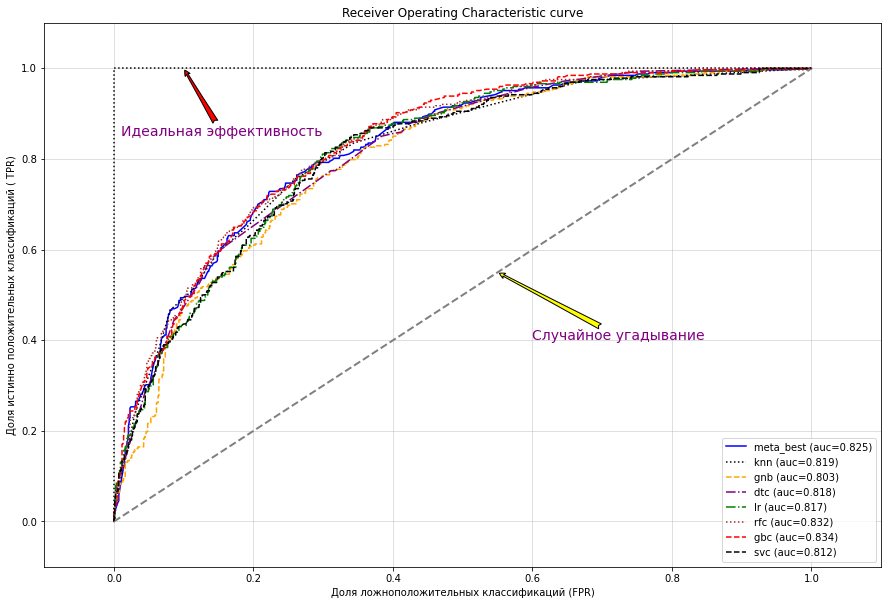

In [122]:
plt.figure(figsize=(15,10))
all_clf=[meta_best,knn_best,gnb_best,dtc_best,lr_best,rfc_best,gbc_best, svc_best]
clf_labels=['meta_best','knn','gnb','dtc','lr','rfc','gbc', 'svc']

colors = ['blue','black','orange','purple','green','brown','red', 'black']
linestyles = ['-',':','--','-.','-.',':','--','--']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred=clf.fit(X_train_std,y_train).predict_proba(X_test_std)[:, 1]
    fpr, tpr, thresholds=roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color=clr,linestyle=ls,label='%s (auc=%0.3f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.plot([0,0,1],[0,1,1],linestyle=':',color='black')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha=0.5)
plt.xlabel('Доля ложноположительных классификаций (FPR)')
plt.ylabel('Доля истинно положительных классификаций ( TPR)')
plt.title('Receiver Operating Characteristic curve')
plt.annotate('Случайное угадывание', xy = (0.55, 0.55),xytext=(0.6, 0.4),
            arrowprops=dict(facecolor='yellow', arrowstyle='fancy'), fontsize=14, color='purple')
plt.annotate('Идеальная эффективность', xy = (0.1, 1),xytext=(0.01, 0.85),
            arrowprops=dict(facecolor='red', arrowstyle='fancy'), fontsize=14, color='purple')
plt.show

### Stacking "из коробки"

In [107]:
estimators = [('knn', KNeighborsClassifier(n_neighbors=13)), ('gnb', GaussianNB()),
             ('svc', SVC(random_state=17, C=0.3, kernel='linear'))]

final_estimator = GradientBoostingClassifier(learning_rate=0.1, random_state=17)

reg = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5, stack_method='auto')

reg.fit(X_train_std, y_train)

y_pred = reg.predict(X_test_std)

print(f'\nStacking_from_BOX roc_auc_score (predict): {roc_auc_score(y_test, y_pred)}')
print('\033[1m' + f'\nStacking_from_BOX roc_auc_score (predict_proba): {roc_auc_score(y_test, reg.predict_proba(X_test_std)[:, 1])}')


Stacking_from_BOX roc_auc_score (predict): 0.6884286515278946

Stacking_from_BOX roc_auc_score (predict_proba): 0.8267188814129519


---

In [187]:
reg.predict_proba(X_test_std)[:, 1]

array([0.70653284, 0.20576019, 0.46489469, ..., 0.66858542, 0.27821847,
       0.0247832 ])

# 4. Сравнение качества моделей 

##### Полученные значения метрики roc_auc (predict):
1. KNN roc_auc_score: 0.6930018222596019
2. GNB roc_auc_score: 0.7310730305578919
3. DTC roc_auc_score: 0.6830564900476591
4. LR roc_auc_score: 0.6668629100084105
5. LR_CV roc_auc_score: 0.6664634146341463
6. SVC roc_auc_score: 0.6677880571909168
7. RFC roc_auc_score: 0.6825063078216989
8. GBC roc_auc_score: 0.6843811326044295
9. ##### Stacking_owned_by_me roc_auc_score: 0.6984265489206616
10. ##### Stacking_from_BOX roc_auc_score: 0.6884286515278946

##### Полученные значения метрики f1_score:
1. KNN f1_score: 0.5553539019963702
2. GNB f1_score: 0.5952941176470589
3. DTC f1_score: 0.5383244206773619
4. LR f1_score: 0.5100182149362477
5. LR_CV f1_score: 0.5098743267504487
6. SVC f1_score: 0.5124555160142349
7. RFC f1_score: 0.5372050816696914
8. GBC f1_score: 0.5406360424028269
9. Stacking_owned_by_me: f1_score: 0.5633333333333332

Выводы: лучшие результаты по roc-auc и f1_score показали модели GNB и Stacking ручной сборки. Ансамблевая модель Stacking-бустинга на более "слабых учениках" позволила получить максимально приближенные к KNN и GNB метрики качества.
Высокое качество GNB-модели объясняется категориальностью большинства фич и целевых признаков.